# **WHAT IS A/B TESTING?**
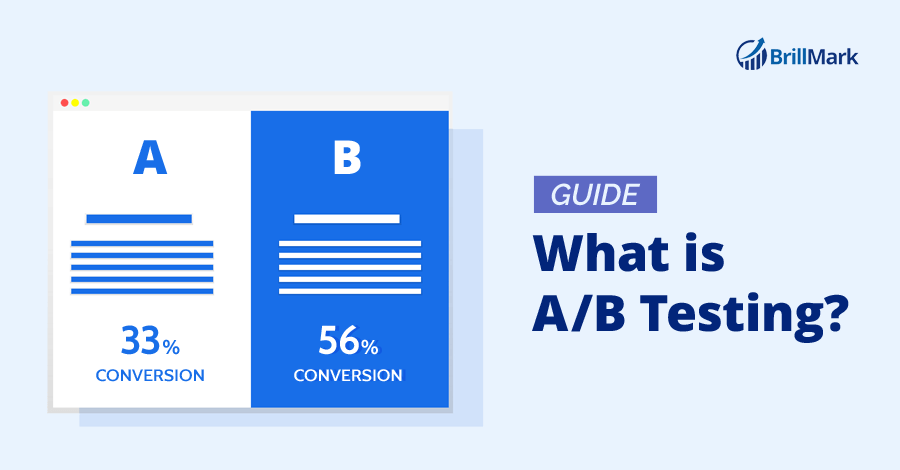

A/B testing (also known as split testing or bucket testing) is a methodology for comparing two versions of a webpage or app against each other to determine which one performs better. A/B testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal. 

To apply the A/B Testing for the dataset we should have follow the fundamental steps according to literature of the A/B Testing. These steps can be seen below:
  - Hypothesis analysis
  - Assumptions Control
  - Apply of the Hypothesis

## **Hypothesis**
Hypothesis testing is formulated in terms of two hypotheses:
  - H0: the null hypothesis;
  - H1: the alternate hypothesis.
  
The hypothesis we want to test is if H1 is “likely” true. So, there are two possible outcomes:
  - Reject H0 and accept H1 because of sufficient evidence in the sample in favor or H1;
  - Do not reject H0 because of insufficient evidence to support H1. 
  
  Note: that failure to reject H0 does not mean the null hypothesis is true. There is no formal outcome that says “accept H0.” It only means that we do not have sufficient evidence to support H1.

## **Assumptions Control**
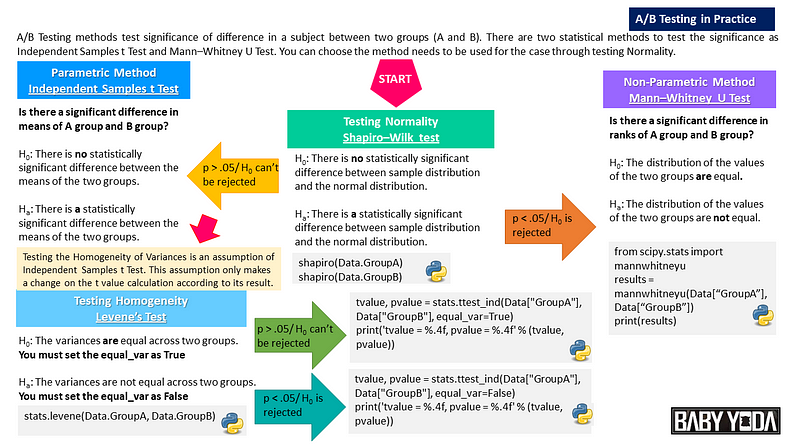


### **Shaphiro Test**
It can be defined as an approach that tests to statistically reveal whether there is a significant difference between sample distribution and the normal distribution.

result:
  - p-value > 0.05 method will be **INDEPENDENT SAMPLES T TEST**
  - p-value < 0.05 method will be **MANN-WHITNEY U TEST**


### **Independent Samples T Test**
Requires another assumption which is Homogeneity before conducting T Test. it can be defined as approach that tests to statictically reveal whether there is a significant difference between the means of two groups of data.

#### **Homogenity Assumptions Test/ Levene's Test**
Result:
  - p-value > 0.05 | **equal_var=True**
  - p-value < 0.05 | **equal_var=False**

### **Mann-Whitney U Test**
It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the distributions of two groups of data.


# **PRACTICE**

## **Data Understanding/ Background**
Aim : In this study is it aimed to reveal whether there is a significant difference in the performance variables provided for two bidding types of facebook. Facebook recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. One of our clients, bombabomba.com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding. In this A/B test, bombabomba.com randomly splits its audience into two equally sized groups, e.g. the test and the control group. A Facebook ad campaign with “maximum bidding” is served to “control group” and another campaign with “average bidding” is served to the “test group”. The A/B test has run for 1 month and bombabomba.com now expects you to analyze and present the results of this A/B test. Purchase is the target value.

variables:
  - Impression – Number of ad views
  - Click – Specifies the number of clicks on the ad that appears.
  - Purchase – Specifies the number of products purchased after clicked ads.
  - Earning – Gain after purchased products​

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
line = '========================'
path_control = './dataset/ab_testing_facebook/ab_testing_control.csv'
path_test = './dataset/ab_testing_facebook/ab_testing_test.csv'
df_control = pd.read_csv(path_control, index_col='Unnamed: 0') #maximum bidding
df_test = pd.read_csv(path_test, index_col='Unnamed: 0')  #average bidding

display(df_control.head())
display(df_test.head())

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [3]:
def data_statistics(data):
    print('NUMERIC FEATURES')
    display(data.describe([0.05,0.25,0.75,0.95]).T)
    if('object' in data.dtypes):
        print('CATEGORICAL FEATURES')
        display(data.describe(include='object'))

def data_profile(data):
    count_of_duplicate = len(data[data.duplicated()])
    data_size = round(data.memory_usage(deep=True).sum()/1000000, 2)
    data_dimension = data.shape
    dtype = data.dtypes
    count_of_null = data.isna().sum()
    null_ratio = round(count_of_null/len(data), 2)
    count_of_distinct = data.nunique()
    distinct_value = data.apply(lambda x: x.unique())
    output = pd.DataFrame(list(zip(dtype, count_of_null, null_ratio, count_of_distinct, distinct_value)),
                          index=data.columns,
                          columns=['dtype','count_of_null','null_ratio','count_of_distinct','distinct_value'])
    print(f'Dimensions\t: {data_dimension}')
    print(f'Data Size\t: {data_size} MB')
    if count_of_duplicate == 0:
        print(f'Duplicated Data\t: {count_of_duplicate}')
    else:
        print(line)
        print(f'Duplicated Data\t: {count_of_duplicate}')
        display(data[data.duplicated()])
    print(line)
    print('SUMMARY')
    display(output)

In [4]:
display(data_statistics(df_control))
display(data_profile(df_control))

NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,79412.017920,85726.690349,99790.701078,115212.816543,132950.532455,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,3367.484257,4124.304129,5001.220602,5923.803596,7374.361202,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,328.662425,470.095533,531.206307,637.957088,748.270761,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1329.577082,1685.847205,1975.160522,2119.802784,2318.528498,2497.295218


None

Dimensions	: (40, 4)
Data Size	: 0.0 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Impression,float64,0,0.0,40,Impression
Click,float64,0,0.0,40,Click
Purchase,float64,0,0.0,40,Purchase
Earning,float64,0,0.0,40,Earning


None

In [5]:
display(data_statistics(df_test))
display(data_profile(df_test))

NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,83150.503777,112691.970770,119291.300775,132050.578933,153178.691063,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,2600.361018,3376.819024,3931.359804,4660.497911,5271.186906,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,356.695400,444.626828,551.355732,699.862360,854.208945,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2080.976213,2280.537426,2544.666107,2761.545405,2931.311449,3171.489708


None

Dimensions	: (40, 4)
Data Size	: 0.0 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Impression,float64,0,0.0,40,Impression
Click,float64,0,0.0,40,Click
Purchase,float64,0,0.0,40,Purchase
Earning,float64,0,0.0,40,Earning


None

## **Feature Engineering**

In [6]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [7]:
df_control['Bidding'] = 'Maximum'
df_test['Bidding'] = 'Average'

df = pd.concat([df_control, df_test]).reset_index(drop=True)

df['ConversionRate'] = (df.Purchase/df.Click)*100 # Conversion Rate
df['EarningPerPurchase'] = (df.Earning/df.Purchase) # Earnings per Purchase

df_control = df[df.Bidding=='Maximum']
df_test = df[df.Bidding=='Average']

df

,Impression,Click,Purchase,Earning,Bidding,ConversionRate,EarningPerPurchase
0,82529.459271,6090.077317,665.211255,2311.277143,Maximum,10.922870,3.474501
1,98050.451926,3382.861786,315.084895,1742.806855,Maximum,9.314152,5.531229
2,82696.023549,4167.965750,458.083738,1797.827447,Maximum,10.990583,3.924670
3,109914.400398,4910.882240,487.090773,1696.229178,Maximum,9.918600,3.482368
4,108457.762630,5987.655811,441.034050,1543.720179,Maximum,7.365721,3.500229
...,...,...,...,...,...,...,...
75,79234.911929,6002.213585,382.047116,2277.863984,Average,6.365104,5.962259
76,130702.239410,3626.320072,449.824592,2530.841327,Average,12.404437,5.626285
77,116481.873365,4702.782468,472.453725,2597.917632,Average,10.046259,5.498777
78,79033.834921,4495.428177,425.359102,2595.857880,Average,9.462038,6.102744


## **A/B Testing**

### **Hypothesis**
H0: There is No statitically significant different between Maximum and Average bidding in Purchase Values

H1: There is statitically significant different between Maximum and Average bidding in Purchase Values

we will conduct all values/columns




In [8]:
variables = ['Impression','Click','Purchase','Earning','ConversionRate','EarningPerPurchase']

In [32]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
import plotly.express as px
# import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pio.renderers.default = 'svg'
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(16,5)})

In [40]:
def ab_testing(data, feature, by, control, test, alpha=0.05):
    fig = px.histogram(data, x=feature, color="Bidding", marginal="box", hover_data=data.columns, opacity=0.75, height=500, width=1400)
    fig.add_vline(x=data[data[by]==test][feature].mean(), line_width=2, line_dash="dash", line_color="crimson",
                annotation_font_color="crimson", 
                annotation_text="mean <br> %.2f" % df[df[by]==test].Impression.mean(), 
                annotation_position="bottom right")
    fig.add_vline(x=data[data[by]==test][feature].median(), line_width=2, line_dash="dot", line_color="crimson", 
                annotation_font_color="crimson", 
                annotation_text="median <br> %.2f" % df[df[by]==test].Impression.median(), 
                annotation_position="bottom left",)
    fig.add_vline(x=data[data[by]==control][feature].mean(), line_width=2, line_dash="dash", line_color="blue", 
                annotation_font_color="blue", 
                annotation_text="mean <br> %.2f" % df[df[by]==control].Impression.mean(), 
                annotation_position="bottom right",)
    fig.add_vline(x=data[data[by]==control][feature].median(), line_width=2, line_dash="dot", line_color="blue",
                annotation_text="median <br> %.2f" % df[df[by]==control].Impression.median(), 
                annotation_font_color="blue", 
                annotation_position="bottom left",)
    fig.update_layout(bargap=0.005, title=f'{feature} Distribution by {by}')
    fig.show(renderer='svg')
    print(line)

    #1 Asumptions Control
    ##1a Shapiro Test
    def shapiro_test():
        df_control_shapiro = shapiro(df_control[feature])
        df_test_shapiro = shapiro(df_test[feature])
        print(f'{feature} - #1 SHAPIRO TEST\n')
        print('df_control_shapiro = %.4f\ndf_test_shapiro = %.4f\n' %(df_control_shapiro.pvalue, df_test_shapiro.pvalue))
        if df_control_shapiro.pvalue > alpha and df_test_shapiro.pvalue > alpha:
            print("Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of " + feature + " values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution.","\n")
            return 1
        elif df_control_shapiro.pvalue < alpha and df_test_shapiro.pvalue < alpha:
            print("Shapiro Wilk Test resulted as p < .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 is rejected. Accordingly distribution of " + feature + " values in control (Maximum Bidding) and test (Average Bidding) are not likely to normal distribution.","\n")
            return 2
        elif df_control_shapiro.pvalue > alpha and df_test_shapiro.pvalue < alpha:
            print("Pay Attention!: Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) while p < .05 for test (Average Bidding) which indicates that H0 is rejected for test (Average Bidding). Accordingly you can check if the " + feature + " values in test (Average Bidding) contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shapiro Wilk Test resulted as p < .05 for control (Maximum Bidding) while p > .05 for test (Average Bidding) which indicates that H0 is rejected for control (Maximum Bidding). Accordingly you can check if the " + feature + " values in control (Maximum Bidding) contain outlier or not","\n")
            return 4
    result_shapiro_test = shapiro_test()

    #2 Method Independent Samples T Test
    if result_shapiro_test == 1:
        #2a Homogeneity/Levene Test
        print(line)
        print(f'{feature} - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test\n')
        df_control_test_levene = levene(df_control[feature], df_test[feature])
        print('df_control_test_levene = %.4f\n' %(df_control_test_levene.pvalue))
        if df_control_test_levene.pvalue > alpha:
            print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal.","\n")
            print(line)
            #2b.1 T-Test 
            print(f'{feature} - #3 INDEPENDENT SAMPLES T TEST\n')
            df_control_test_ttest_ind = ttest_ind(df_control[feature], df_test[feature])
            print('df_control_test_ttest_ind = %.4f\n' %(df_control_test_ttest_ind.pvalue))
            print(f'Mean of control (Maximum Bidding): {df_control[feature].mean()}')
            print(f'Stdev of control (Maximum Bidding): {df_control[feature].std()}')
            print(f'Mean of test (Average Bidding): {df_test[feature].mean()}')
            print(f'Stdev of test (Average Bidding): {df_test[feature].std()}\n')
            if df_control_test_ttest_ind.pvalue > alpha:
                print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between control (Maximum Bidding) and test (Average Bidding) in " + feature + " values.","\n")
            else:
                print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in " + feature +" values.\n")
        else:
            print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are not equal.","\n")
            print(line)
            #2b.2 T-Test
            print(f'{feature} - #3 INDEPENDENT SAMPLES T TEST\n')
            df_control_test_ttest_ind = ttest_ind(df_control[feature], df_test[feature], equal_var=False)
            print('df_control_test_ttest_ind = %.4f\n' %(df_control_test_ttest_ind.pvalue))
            print(f'Mean of control (Maximum Bidding): {df_control[feature].mean()}')
            print(f'Stdev of control (Maximum Bidding): {df_control[feature].std()}')
            print(f'Mean of test (Average Bidding): {df_test[feature].mean()}')
            print(f'Stdev of test (Average Bidding): {df_test[feature].std()}\n')
            if df_control_test_ttest_ind.pvalue > alpha:
                print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between control (Maximum Bidding) and test (Average Bidding) in " + feature + " values.","\n")
            else: 
                print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in " + feature +" values.","\n")
    else:
        #2 MANN-WHITNEY U TEST
        print(line)
        print(f'{feature} - #2 METHOD MANN-WHITNEY U TEST')
        df_control_test_mannwhiteneyu = mannwhitneyu(df_control[feature], df_test[feature])
        print('df_control_test_mannwhiteneyu = %.4f\n' %(df_control_test_mannwhiteneyu.pvalue))
        print(f'Mean of control (Maximum Bidding): {df_control[feature].mean()}')
        print(f'Stdev of control (Maximum Bidding): {df_control[feature].std()}')
        print(f'Mean of test (Average Bidding): {df_test[feature].mean()}')
        print(f'Stdev of test (Average Bidding): {df_test[feature].std()}\n')
        if df_control_test_mannwhiteneyu.pvalue > alpha:
            print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between control (Maximum Bidding) and test (Average Bidding) in distributions of " + feature + " values.","\n")
        else: 
            print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in distributions of " + feature + " values.","\n")

### **By Impression**

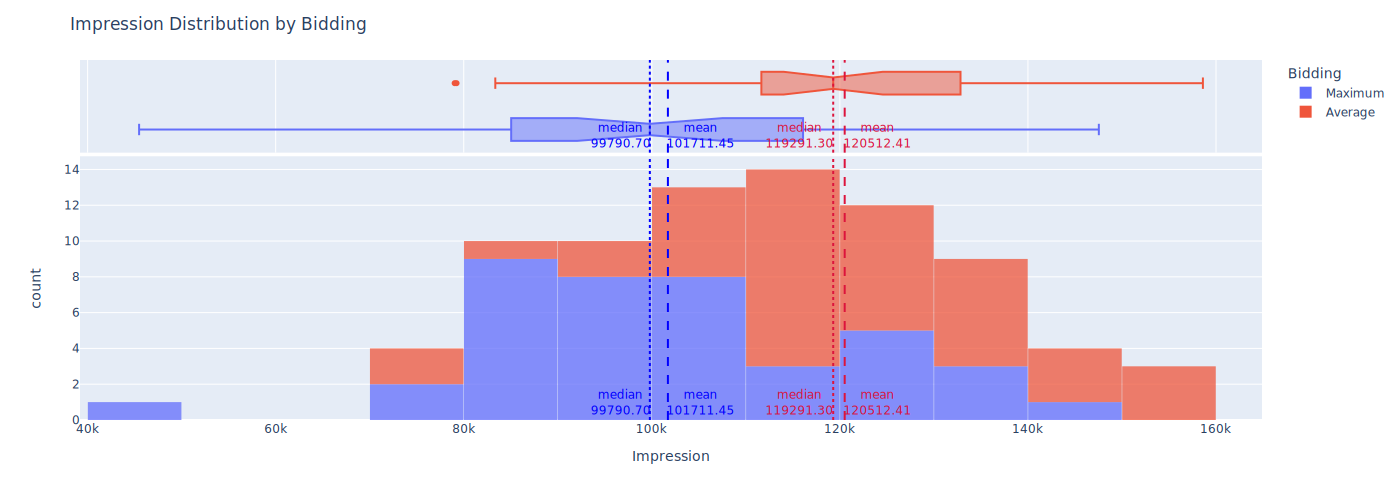

Impression - #1 SHAPIRO TEST

df_control_shapiro = 0.3514
df_test_shapiro = 0.4148

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Impression values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

Impression - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.4461

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal. 

Impression - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.0000

Mean of control (Maximum Bidding): 101711.44906769728
Stdev of control (Maximum Bidding): 20302.157861865886
Mean of test (Average Bidding): 120512.41175753452
Stdev of test (Average Bidding): 18807.44871181768

Independent Samples t Test resulted as p < .05 

In [41]:
ab_testing(data=df,feature='Impression',by='Bidding',control='Maximum',test='Average')

### **By Click**

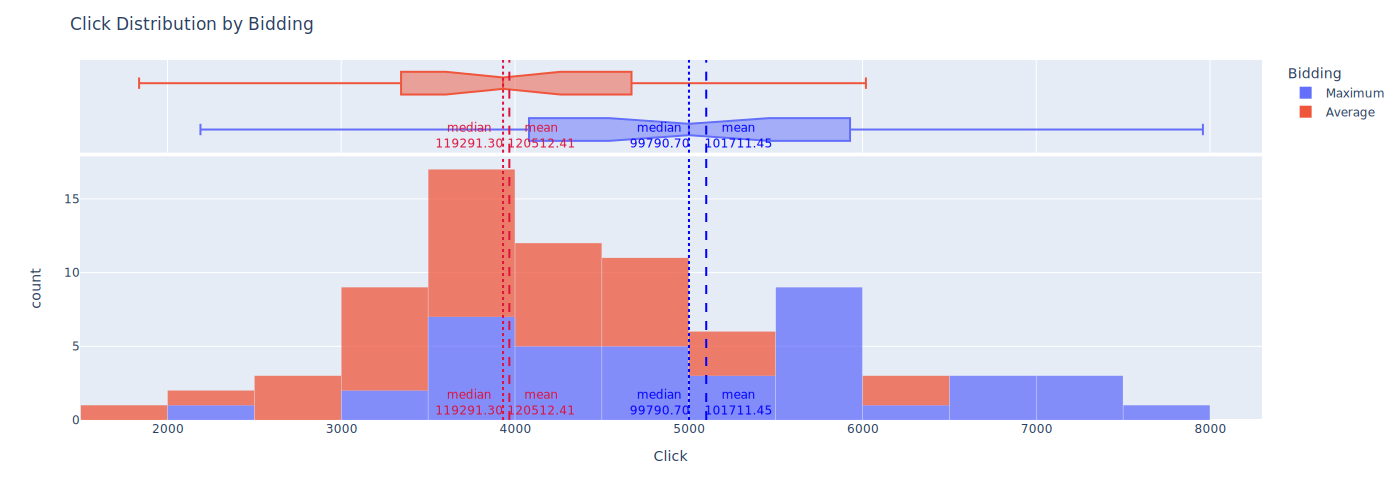

Click - #1 SHAPIRO TEST

df_control_shapiro = 0.8461
df_test_shapiro = 0.9699

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Click values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

Click - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.0141

Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are not equal. 

Click - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.0000

Mean of control (Maximum Bidding): 5100.657372577279
Stdev of control (Maximum Bidding): 1329.9854982620038
Mean of test (Average Bidding): 3967.54976080602
Stdev of test (Average Bidding): 923.0950732454937

Independent Samples t Test resulted as p < .05 which indicates that H0 is 

In [42]:
ab_testing(data=df,feature='Click',by='Bidding',control='Maximum',test='Average')

### **By Purchase**

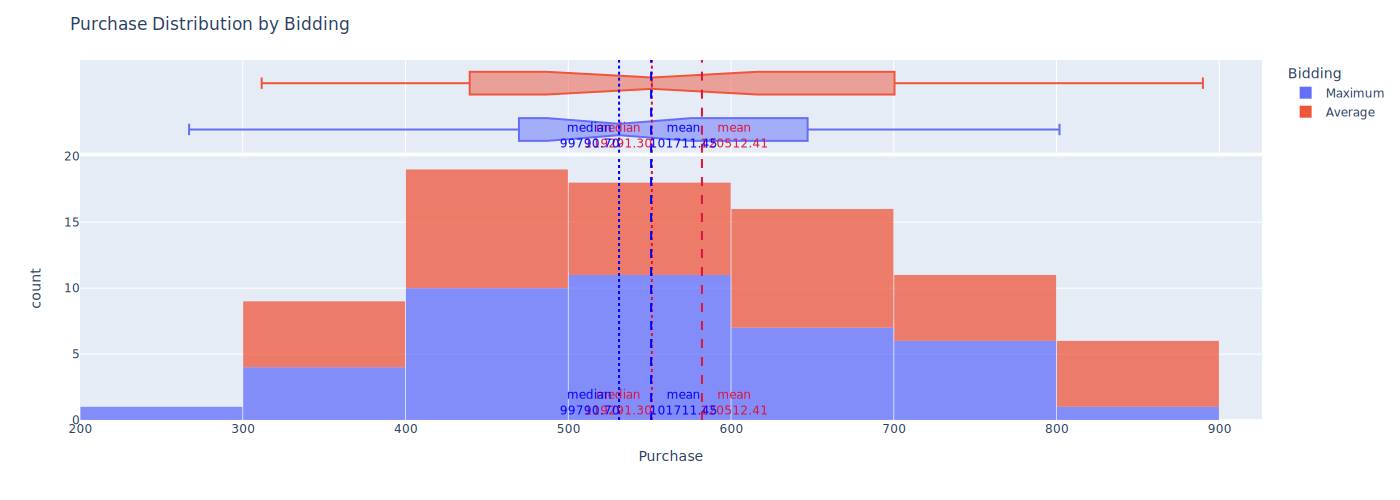

Purchase - #1 SHAPIRO TEST

df_control_shapiro = 0.5891
df_test_shapiro = 0.1541

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Purchase values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

Purchase - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.1083

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal. 

Purchase - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.3493

Mean of control (Maximum Bidding): 550.8940587702316
Stdev of control (Maximum Bidding): 134.10820126621695
Mean of test (Average Bidding): 582.1060966484677
Stdev of test (Average Bidding): 161.1525134469209

Independent Samples t Test resulted as p > .05 which indi

In [43]:
ab_testing(data=df,feature='Purchase',by='Bidding',control='Maximum',test='Average')

### **By Earning**

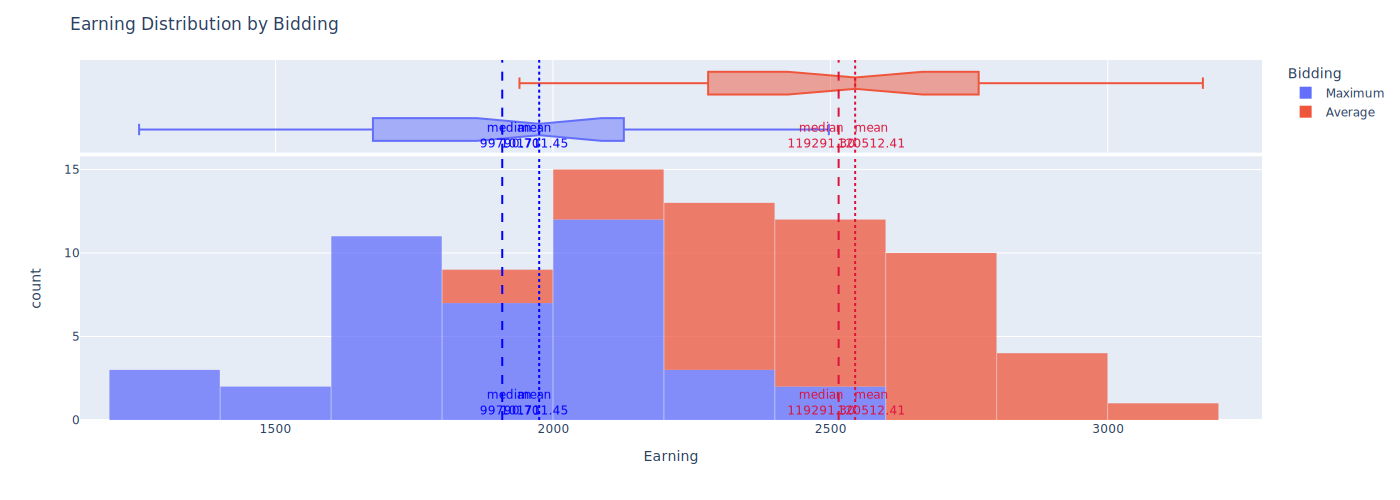

Earning - #1 SHAPIRO TEST

df_control_shapiro = 0.5306
df_test_shapiro = 0.6163

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Earning values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

Earning - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.5540

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal. 

Earning - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.0000

Mean of control (Maximum Bidding): 1908.568299802749
Stdev of control (Maximum Bidding): 302.91778296293865
Mean of test (Average Bidding): 2514.8907326506173
Stdev of test (Average Bidding): 282.7308522215064

Independent Samples t Test resulted as p < .05 which indicat

In [44]:
ab_testing(data=df,feature='Earning',by='Bidding',control='Maximum',test='Average')

### **By ConversionRate**

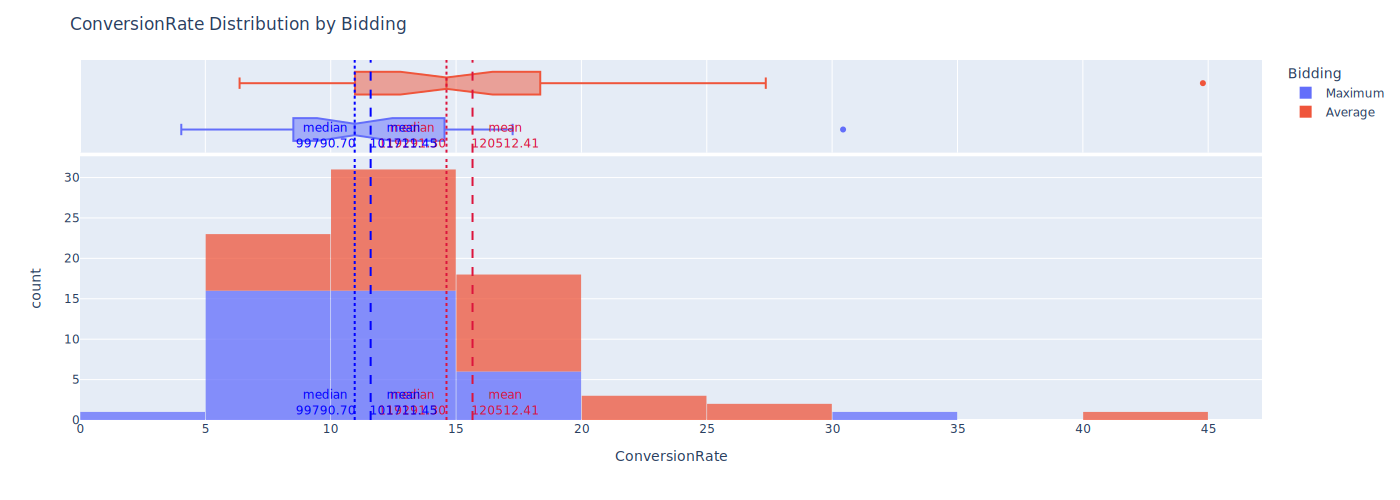

ConversionRate - #1 SHAPIRO TEST

df_control_shapiro = 0.0003
df_test_shapiro = 0.0000

Shapiro Wilk Test resulted as p < .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 is rejected. Accordingly distribution of ConversionRate values in control (Maximum Bidding) and test (Average Bidding) are not likely to normal distribution. 

ConversionRate - #2 METHOD MANN-WHITNEY U TEST
df_control_test_mannwhiteneyu = 0.0011

Mean of control (Maximum Bidding): 11.592561427164819
Stdev of control (Maximum Bidding): 4.542166281097064
Mean of test (Average Bidding): 15.656625309447392
Stdev of test (Average Bidding): 6.815625140168104

Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in distributions of ConversionRate values. 



In [45]:
ab_testing(data=df,feature='ConversionRate',by='Bidding',control='Maximum',test='Average')

##  **Result**
#####========================

Impression - #1 SHAPIRO TEST

df_control_shapiro = 0.3514
df_test_shapiro = 0.4148

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Impression values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

========================

Impression - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.4461

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal. 

========================

Impression - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.0000

    - Mean of control (Maximum Bidding): 101711.44906769728
    - Stdev of control (Maximum Bidding): 20302.157861865886
    - Mean of test (Average Bidding): 120512.41175753452
    - Stdev of test (Average Bidding): 18807.44871181768

Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in Impression values.

#####========================

Click - #1 SHAPIRO TEST

df_control_shapiro = 0.8461

df_test_shapiro = 0.9699

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Click values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

========================

Click - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.0141

Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are not equal. 

========================

Click - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.0000

    - Mean of control (Maximum Bidding): 5100.657372577279
    - Stdev of control (Maximum Bidding): 1329.9854982620038
    - Mean of test (Average Bidding): 3967.54976080602
    - Stdev of test (Average Bidding): 923.0950732454937

Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in Click values. 

#####========================

Purchase - #1 SHAPIRO TEST

df_control_shapiro = 0.5891

df_test_shapiro = 0.1541

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Purchase values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

========================

Purchase - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.1083

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal. 

========================

Purchase - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.3493

    - Mean of control (Maximum Bidding): 550.8940587702316
    - Stdev of control (Maximum Bidding): 134.10820126621695
    - Mean of test (Average Bidding): 582.1060966484677
    - Stdev of test (Average Bidding): 161.1525134469209

Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between control (Maximum Bidding) and test (Average Bidding) in Purchase values. 

#####========================

Earning - #1 SHAPIRO TEST

df_control_shapiro = 0.5306

df_test_shapiro = 0.6163

Shapiro Wilk Test resulted as p > .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 can NOT be rejected. Accordingly distribution of Earning values in control (Maximum Bidding) and test (Average Bidding) are likely to normal distribution. 

========================

Earning - #2 METHOD INDEPENDENT SAMPLES T TEST --> Homogeneity/Levene Test

df_control_test_levene = 0.5540

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of control (Maximum Bidding) and test (Average Bidding) are equal. 

========================

Earning - #3 INDEPENDENT SAMPLES T TEST

df_control_test_ttest_ind = 0.0000

    - Mean of control (Maximum Bidding): 1908.568299802749
    - Stdev of control (Maximum Bidding): 302.91778296293865
    - Mean of test (Average Bidding): 2514.8907326506173
    - Stdev of test (Average Bidding): 282.7308522215064

Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in Earning values.

#####========================

ConversionRate - #1 SHAPIRO TEST

df_control_shapiro = 0.0003

df_test_shapiro = 0.0000

Shapiro Wilk Test resulted as p < .05 for control (Maximum Bidding) and test (Average Bidding) which indicates that H0 is rejected. Accordingly distribution of ConversionRate values in control (Maximum Bidding) and test (Average Bidding) are not likely to normal distribution. 

========================

ConversionRate - #2 METHOD MANN-WHITNEY U TEST

df_control_test_mannwhiteneyu = 0.0011

    - Mean of control (Maximum Bidding): 11.592561427164819
    - Stdev of control (Maximum Bidding): 4.542166281097064
    - Mean of test (Average Bidding): 15.656625309447392
    - Stdev of test (Average Bidding): 6.815625140168104

Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between control (Maximum Bidding) and test (Average Bidding) in distributions of ConversionRate values. 




## **Conclusion**

There is no significant difference in Num of Purchase. If you want to decide according to one metric, both bidding system can be choosen but control (Maximum Bidding) data shows a lower std dev which can be more trustworty.

According to the results test data (Average Bidding) has greater mean/median values in Earning, Conversion Rate, and Impression compared to GroupA (Maximum Bidding). Average Bidding is better than Maximum Bidding.